In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Question 1: Data Loading

In [2]:
confirmed = pd.read_csv('covid_19_confirmed_v1.csv')
deaths = pd.read_csv('covid_19_deaths_v1.csv')
recovered = pd.read_csv('covid_19_recovered_v1.csv')

Q1.1: How do you load the COVID-19 datasets for confirmed cases, deaths, and recoveries into Python using Pandas?

In [3]:
print("Confirmed Cases:")
print(confirmed.head())

print("\nDeaths:")
print(deaths.head())

print("\nRecovered Cases:")
print(recovered.head())


Confirmed Cases:
  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  5/20/21  5/21/21  5/22/21  \
0        0        0        0        0  ...    64575    65080    65486   
1        0        0        0        0  ...   132118   132153   132176   
2        0        0        0        0  ...   126156   126434   126651   
3        0        0        0        0  ...    13569    13569    13569   
4        0        0        0        0  ...    31661    31909    32149   

   5/23/21  5/24/21  5/25/21  5/26/21  5/27/21  5/28/21  5/29/21  
0    65728    66275    66903    

**Question 2: Data Exploration**

Q2.1: After loading the datasets, what is the structure of each dataset in terms of rows, columns, and data types?

In [4]:
print("Confirmed Cases Dataset:")
print(confirmed.shape, confirmed.dtypes)

print("\nDeaths Dataset:")
print(deaths.shape, deaths.dtypes)

print("\nRecovered Cases Dataset:")
print(recovered.shape, recovered.dtypes)

Confirmed Cases Dataset:
(276, 498) Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/25/21             int64
5/26/21             int64
5/27/21             int64
5/28/21             int64
5/29/21             int64
Length: 498, dtype: object

Deaths Dataset:
(277, 498) Column1      object
Column2      object
Column3      object
Column4      object
Column5      object
              ...  
Column494    object
Column495    object
Column496    object
Column497    object
Column498    object
Length: 498, dtype: object

Recovered Cases Dataset:
(262, 498) Column1      object
Column2      object
Column3      object
Column4      object
Column5      object
              ...  
Column494    object
Column495    object
Column496    object
Column497    object
Column498    object
Length: 498, dtype: object


Q2.2: Generate plots of confirmed cases over time for the top countries.

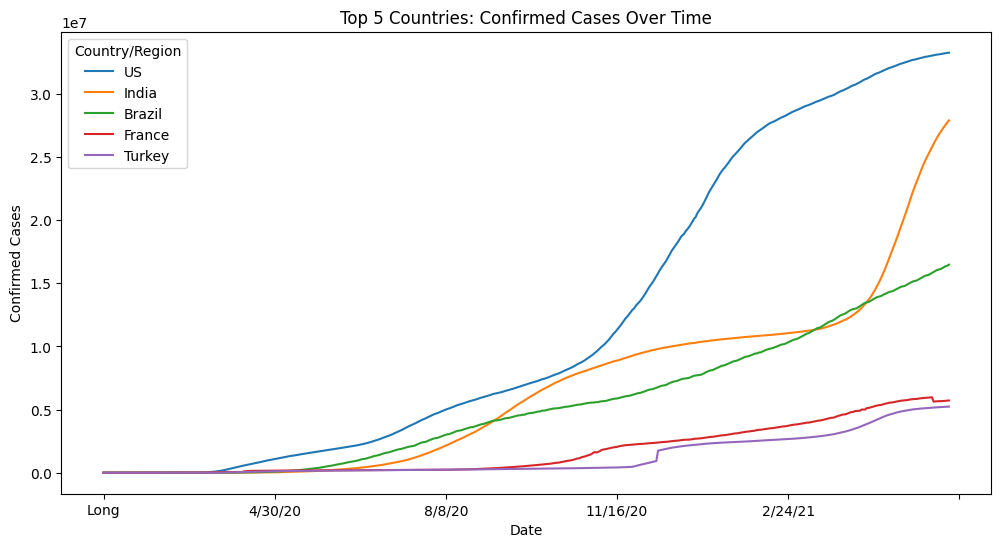

In [5]:
# Aggregate by country
confirmed_country = confirmed.groupby('Country/Region').sum().iloc[:, 2:]

# top 5 countries
top_countries = confirmed_country.iloc[:, -1].sort_values(ascending=False).head(5).index

confirmed_country.loc[top_countries].T.plot(figsize=(12, 6))
plt.title("Top 5 Countries: Confirmed Cases Over Time")
plt.ylabel("Confirmed Cases")
plt.xlabel("Date")
plt.show()

Q2.3: Generate plots of confirmed cases over time for China.

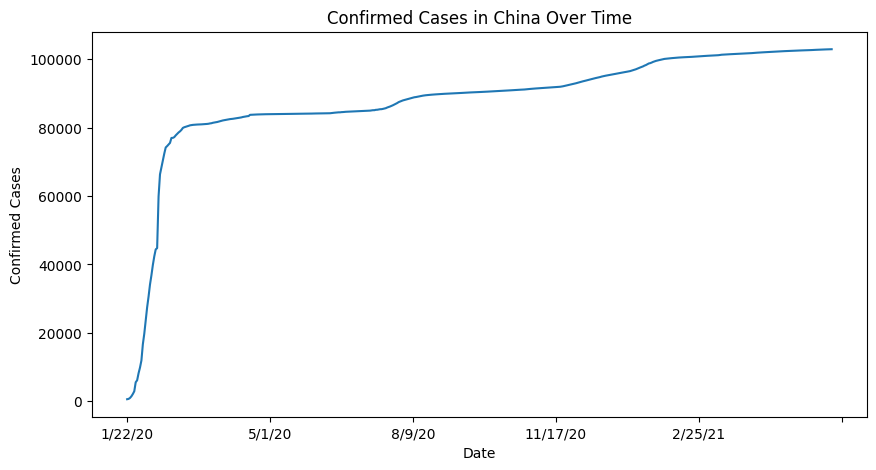

In [6]:
china_data = confirmed[confirmed['Country/Region'] == 'China'].iloc[:, 4:].sum()

china_data.plot(figsize=(10, 5))
plt.title("Confirmed Cases in China Over Time")
plt.ylabel("Confirmed Cases")
plt.xlabel("Date")
plt.show()

Question 3: Handling Missing Data

Q3.1: Identify these missing values and replace them using a suitable imputation method, such as forward filling, for time-series data.

In [7]:
def fill_missing(df):
    date_cols = df.columns[4:]
    df[date_cols] = df[date_cols].fillna(method='ffill', axis=1).fillna(0)
    return df

confirmed = fill_missing(confirmed)
deaths = fill_missing(deaths)
recovered = fill_missing(recovered)


C:\Users\ajitk\AppData\Local\Temp\ipykernel_23396\809602799.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[date_cols] = df[date_cols].fillna(method='ffill', axis=1).fillna(0)


Question 4: Data Cleaning and Preparation


Q4.1: Replace blank values in the province column with “All Provinces.”

In [8]:
confirmed['Province/State'] = confirmed['Province/State'].fillna('All Provinces')


In [9]:
recovered['Column1'] = recovered['Column1'].fillna('All Provinces')
deaths['Column1'] = deaths['Column1'].fillna('All Provinces')


Question 5: Independent Dataset Analysis

Q5.1: Analyze the peak number of daily new cases in Germany, France, and Italy. Which country experienced the highest single-day surge, and when did it occur?

C:\Users\ajitk\AppData\Local\Temp\ipykernel_23396\2075738751.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  europe['Date'] = pd.to_datetime(europe['Date'])
C:\Users\ajitk\AppData\Local\Temp\ipykernel_23396\2075738751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europe['Date'] = pd.to_datetime(europe['Date'])


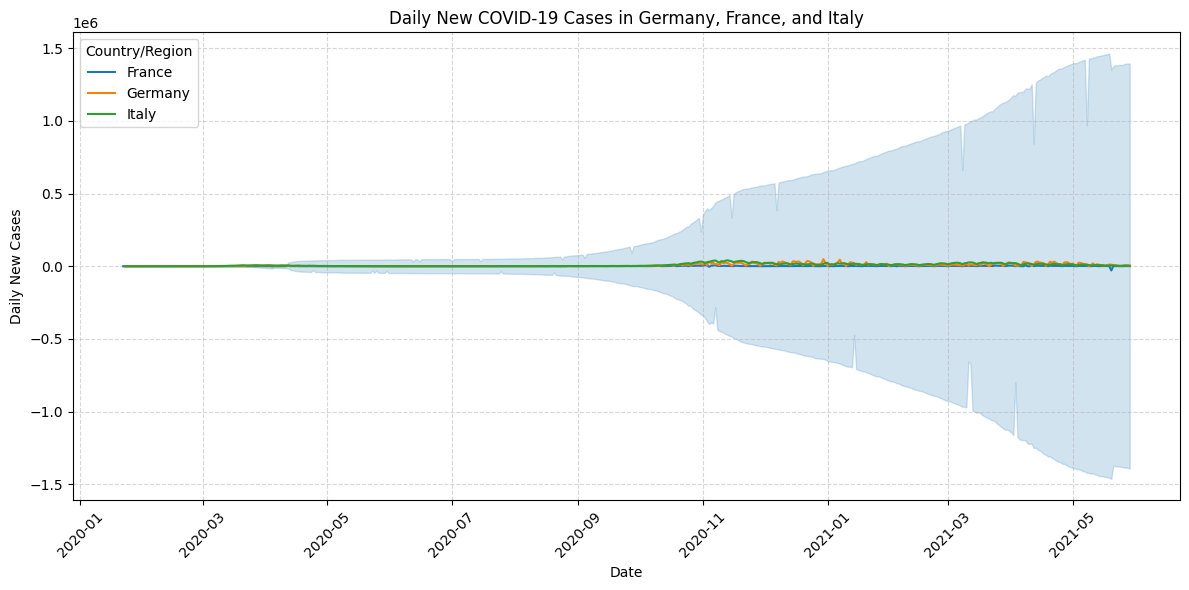

In [10]:
confirmed_long = confirmed.melt(id_vars=['Country/Region', 'Province/State'], value_vars=confirmed.columns[4:], var_name='Date', value_name='Cases')
europe = confirmed_long[confirmed_long['Country/Region'].isin(['Germany', 'France', 'Italy'])]
europe['Date'] = pd.to_datetime(europe['Date'])
europe = europe.sort_values(['Country/Region', 'Date'])
europe['Daily New Cases'] = europe.groupby('Country/Region')['Cases'].diff()

# Find the peak record
peak = europe.loc[europe.groupby('Country/Region')['Daily New Cases'].idxmax()]
top_peak = peak.loc[peak['Daily New Cases'].idxmax()]

plt.figure(figsize=(12, 6))
sns.lineplot(data=europe, x='Date', y='Daily New Cases', hue='Country/Region')
plt.title("Daily New COVID-19 Cases in Germany, France, and Italy")
plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Q5.2: Compare the recovery rates (recoveries/confirmed cases) between Canada and Australia as of December 31, 2020. Which country showed better management of the pandemic according to this metric

In [11]:
# Filter data up to Dec 31, 2020
date_col = '12/31/20'

recovered_ca = recovered[recovered['Country/Region'] == 'Canada'][date_col].sum()
confirmed_ca = confirmed[confirmed['Country/Region'] == 'Canada'][date_col].sum()

recovered_au = recovered[recovered['Country/Region'] == 'Australia'][date_col].sum()
confirmed_au = confirmed[confirmed['Country/Region'] == 'Australia'][date_col].sum()

rate_ca = recovered_ca / confirmed_ca
rate_au = recovered_au / confirmed_au

print(f"Canada Recovery Rate: {rate_ca:.2%}, Australia: {rate_au:.2%}")

KeyError: 'Country/Region'

Q5.3: What is the distribution of death rates (deaths/confirmed cases) among provinces in Canada? Identify the province with the highest and lowest death rate as of the latest data point.

In [ ]:
canada_deaths = deaths[deaths['Country/Region'] == 'Canada']
canada_confirmed = confirmed[confirmed['Country/Region'] == 'Canada']

death_rate = (canada_deaths.iloc[:, -1] / canada_confirmed.iloc[:, -1]).sort_values()
print("Death Rate by Province (Canada):")
print(death_rate)

Question 6: Data Transformation

Q6.1: Transform the 'deaths' dataset from wide format (where each column represents a date) to long format, where each row represents a single date, ensuring that the date column is in datetime format. How would this transformation be executed?

In [ ]:
deaths_long = deaths.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Date',
    value_name='Deaths'
)

deaths_long['Date'] = pd.to_datetime(deaths_long['Date'])
print(deaths_long.head())

Q6.2: What is the total number of deaths reported per country up to the current date?

In [ ]:
total_deaths = deaths.groupby('Country/Region').sum().iloc[:, 2:].max(axis=1)
print(total_deaths.sort_values(ascending=False))

Q6.3: What are the top 5 countries with the highest average daily deaths?

In [ ]:
deaths_diff = deaths.set_index(['Country/Region']).iloc[:, 2:].diff(axis=1)
avg_daily_deaths = deaths_diff.mean(axis=1).sort_values(ascending=False).head(5)
print(avg_daily_deaths)

Q6.4: How have the total deaths evolved over time in the United States?

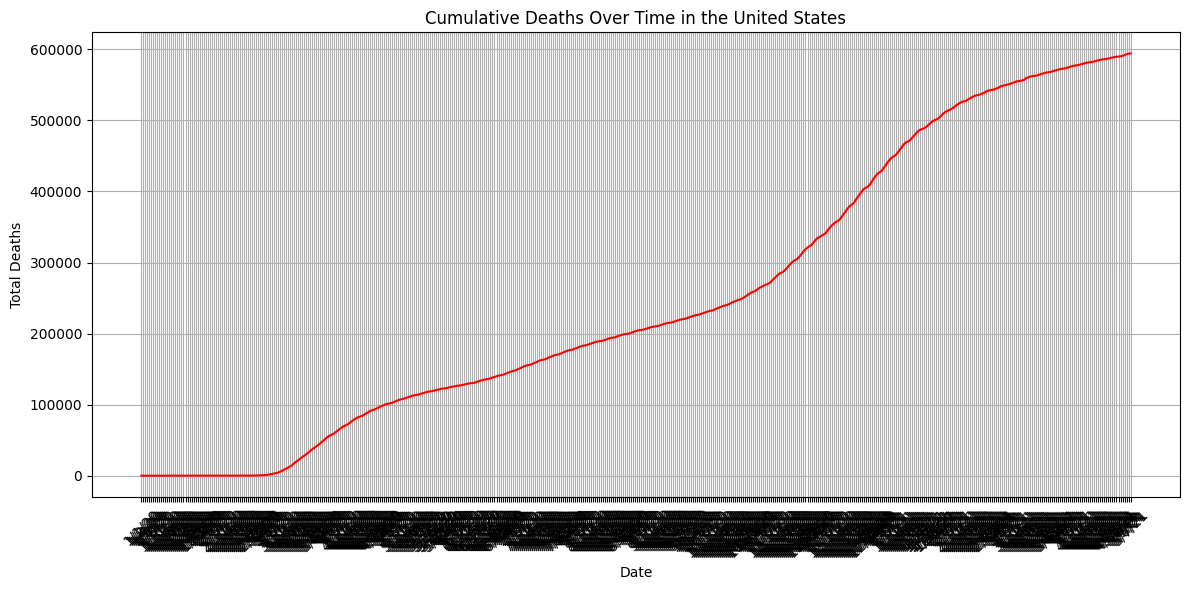

In [ ]:
columns = ['Province/State', 'Country/Region', 'Lat', 'Long'] + [f"{m}/{d}/{y}" for y in [20, 21] for m in range(1, 13) for d in range(1, 32)
     if (y == 20 or (y == 21 and m <= 5)) and not ((m == 2 and d > 29) or (m in [4,6,9,11] and d > 30))] 
columns = columns[:498]
deaths = pd.read_csv('covid_19_deaths_v1.csv', header=None, names=columns)

# Drop Unnecessary Columns
deaths = deaths.drop(['Lat', 'Long'], axis=1)

# Convert Date Columns to Numeric
date_cols = deaths.columns[2:]
deaths[date_cols] = deaths[date_cols].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Melt to Long Format
deaths_long = deaths.melt(
    id_vars=['Province/State', 'Country/Region'],
    value_vars=date_cols,
    var_name='Date',
    value_name='Deaths'
)

deaths_long['Daily_Deaths'] = deaths_long.groupby('Country/Region')['Deaths'].diff().fillna(0).astype(int)
us_data = deaths_long[deaths_long['Country/Region'] == 'US']

plt.figure(figsize=(12, 6))
plt.plot(us_data['Date'], us_data['Deaths'], color='red')
plt.title("Cumulative Deaths Over Time in the United States")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Question 7: Data Merging

Q7.1: How would you merge the transformed datasets of confirmed cases, deaths, and recoveries on the 'Country/Region' and 'Date' columns to create a comprehensive view of the pandemic's impact?

In [ ]:
def load_and_transform(filepath, case_type):
    df = pd.read_csv(filepath)

    if 'Province/State' not in df.columns:
        df.columns = [f"Column{i}" for i in range(len(df.columns))]

        # Manually assign correct column names
        columns = ['Province/State', 'Country/Region', 'Lat', 'Long'] + \
                  [f"{m}/{d}/{y}" for y in [20, 21, 22] for m in range(1, 13) for d in range(1, 32)
                   if f"{m}/{d}/{y}" in pd.read_csv(filepath, nrows=0).columns]
        df = df.iloc[:, :len(columns)]
        df.columns = columns

    # Drop unnecessary columns and melt to long format
    df = df.drop(['Lat', 'Long'], axis=1, errors='ignore')
    df_long = df.melt(
        id_vars=['Province/State', 'Country/Region'],
        var_name='Date',
        value_name=case_type
    )

    # Convert Date to datetime and fill missing values with 0
    df_long['Date'] = pd.to_datetime(df_long['Date'], errors='coerce')
    df_long[case_type] = pd.to_numeric(df_long[case_type], errors='coerce').fillna(0).astype(int)

    return df_long

# Load and transform each dataset
confirmed_long = load_and_transform('covid_19_confirmed_v1.csv', 'Confirmed')
deaths_long = load_and_transform('covid_19_deaths_v1.csv', 'Deaths')
recovered_long = load_and_transform('covid_19_recovered_v1.csv', 'Recovered')

merged = pd.merge(confirmed_long, deaths_long, on=['Country/Region', 'Date'], how='outer')
merged = pd.merge(merged, recovered_long, on=['Country/Region', 'Date'], how='outer')

merged[['Confirmed', 'Deaths', 'Recovered']] = merged[['Confirmed', 'Deaths', 'Recovered']].fillna(0).astype(int)
merged = merged.sort_values(['Country/Region', 'Date']).reset_index(drop=True)
print(merged.head())

C:\Users\ajitk\AppData\Local\Temp\ipykernel_15884\2404833234.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_long['Date'] = pd.to_datetime(df_long['Date'], errors='coerce')


  Province/State_x Country/Region       Date  Confirmed Province/State_y  \
0              NaN    Afghanistan 2020-01-22          0              NaN   
1              NaN    Afghanistan 2020-01-23          0              NaN   
2              NaN    Afghanistan 2020-01-24          0              NaN   
3              NaN    Afghanistan 2020-01-25          0              NaN   
4              NaN    Afghanistan 2020-01-26          0              NaN   

   Deaths Province/State  Recovered  
0       0            NaN          0  
1       0            NaN          0  
2       0            NaN          0  
3       0            NaN          0  
4       0            NaN          0  


Q7.2: Analyze the monthly sum of confirmed cases, deaths, and recoveries for countries to understand the progression of the pandemic.[From the merged dataset]

Monthly summary of cases, deaths, and recoveries by country:
  Country/Region YearMonth  Confirmed  Deaths  Recovered
0    Afghanistan   2020-01          0       0          0
1    Afghanistan   2020-02          6       0          0
2    Afghanistan   2020-03       1164       0          0
3    Afghanistan   2020-04      27074       0          0
4    Afghanistan   2020-05     225674       0          0


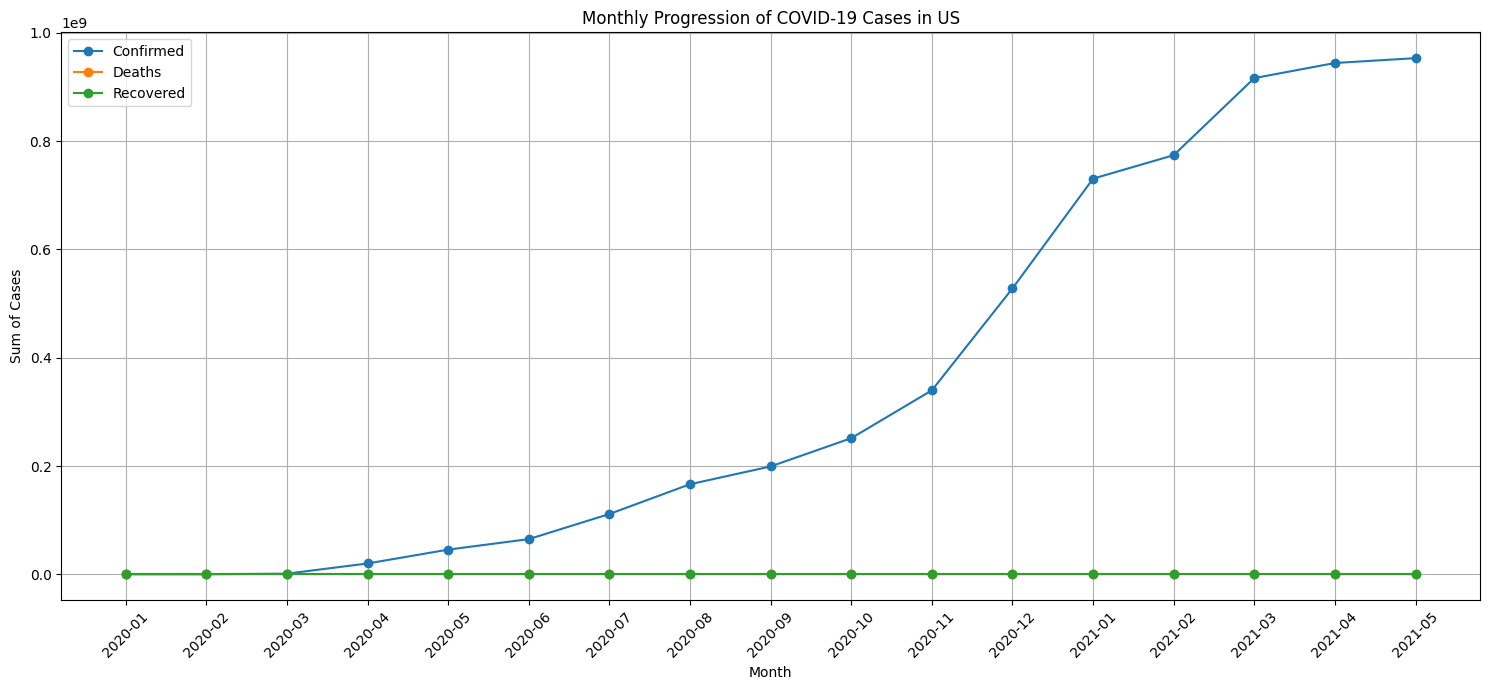

In [ ]:
merged['Date'] = pd.to_datetime(merged['Date'])
merged['YearMonth'] = merged['Date'].dt.to_period('M')
monthly_summary = merged.groupby(['Country/Region', 'YearMonth']).agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()
monthly_summary['YearMonth'] = monthly_summary['YearMonth'].astype(str)

print("Monthly summary of cases, deaths, and recoveries by country:")
print(monthly_summary.head())

# Example: Plot monthly progression for a specific country (e.g., United States)
country_to_plot = 'US'
us_monthly = monthly_summary[monthly_summary['Country/Region'] == country_to_plot]

if not us_monthly.empty:
    plt.figure(figsize=(15, 7))
    plt.plot(us_monthly['YearMonth'], us_monthly['Confirmed'], label='Confirmed', marker='o')
    plt.plot(us_monthly['YearMonth'], us_monthly['Deaths'], label='Deaths', marker='o')
    plt.plot(us_monthly['YearMonth'], us_monthly['Recovered'], label='Recovered', marker='o')

    plt.title(f'Monthly Progression of COVID-19 Cases in {country_to_plot}')
    plt.xlabel('Month')
    plt.ylabel('Sum of Cases')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"Data for {country_to_plot} not found in the merged dataset.")

Q7.3: Redo the analysis in Question 7.2 for the United States, Italy, and Brazil.

In [12]:
def generate_date_columns():
    date_cols = []
    for year in [20, 21]: 
        for month in range(1, 13): 
            if year == 21 and month > 5: 
                break
            for day in range(1, 32): 
                if (month == 2 and day > 29) or (month in [4, 6, 9, 11] and day > 30):  # Handle leap year and short months
                    continue
                date_cols.append(f"{month}/{day}/{year}")
    return date_cols[:494]  
# Load raw datasets
confirmed_df = pd.read_csv('covid_19_confirmed_v1.csv', header=None, names=['Province/State', 'Country/Region', 'Lat', 'Long'] + generate_date_columns())
deaths_df = pd.read_csv('covid_19_deaths_v1.csv', header=None, names=['Province/State', 'Country/Region', 'Lat', 'Long'] + generate_date_columns())
recovered_df = pd.read_csv('covid_19_recovered_v1.csv', header=None, names=['Province/State', 'Country/Region', 'Lat', 'Long'] + generate_date_columns())

# Function to transform datasets into long format
def transform(df, metric_name):
    df = df[['Country/Region'] + generate_date_columns()].copy() 
    date_cols = generate_date_columns()
    df[date_cols] = df[date_cols].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int) 
    melted = df.melt(id_vars=['Country/Region'], value_vars=date_cols, var_name='Date', value_name=metric_name)  # Melt into long format
    # melted['Date'] = pd.to_datetime(melted['Date'], format='%m/%d/%y')  # Parse dates
    return melted

# Transform each dataset
confirmed_long = transform(confirmed_df, 'Confirmed')
deaths_long = transform(deaths_df, 'Deaths')
recovered_long = transform(recovered_df, 'Recovered')

# Merge datasets
merged = pd.merge(confirmed_long, deaths_long, on=['Country/Region', 'Date'], how='outer')
merged = pd.merge(merged, recovered_long, on=['Country/Region', 'Date'], how='outer')
merged[['Confirmed', 'Deaths', 'Recovered']] = merged[['Confirmed', 'Deaths', 'Recovered']].fillna(0).astype(int)




Question 8: Combined Data Analysis

Q8.1: For the combined dataset, identify the three countries with the highest average death rates (deaths/confirmed cases) throughout 2020. What might this indicate about the pandemic's impact in these countries?

In [ ]:
merged_df = pd.read_csv('merged_covid_data.csv')
merged_2020 = merged_df[merged_df['Date'] < '2021-01-01']
# Aggregate confirmed cases and deaths by country
country_totals = merged_2020.groupby('Country/Region')[['Confirmed', 'Deaths']].sum().reset_index()
# Calculate death rate
country_totals['Death_Rate'] = country_totals['Deaths'] / country_totals['Confirmed']
top_death_rate_countries = country_totals.sort_values(by='Death_Rate', ascending=False).head(3)

plt.figure(figsize=(10, 6))
plt.bar(top_death_rate_countries['Country/Region'], top_death_rate_countries['Death_Rate'] * 100, color=['red', 'orange', 'blue'])
plt.title("Top 3 Countries by Death Rate (2020)")
plt.ylabel("Death Rate (%)")
plt.xlabel("Country")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Q8.2: Using the merged dataset, compare the total number of recoveries to the total number of deaths in South Africa. What can this tell us about the outcomes of COVID-19 cases in the country?

In [ ]:
def generate_date_columns():
    date_cols = []
    for y in [20, 21]:  
        for m in range(1, 13):
            if y == 21 and m > 5:  
                break
            for d in range(1, 32):
                if (m == 2 and d > 29) or (m in [4, 6, 9, 11] and d > 30):
                    continue
                date_cols.append(f"{m}/{d}/{y}")
    return date_cols[:494]

# Define columns
date_columns = generate_date_columns()
columns = ['Province/State', 'Country/Region', 'Lat', 'Long'] + date_columns

# Load datasets
confirmed_df = pd.read_csv('covid_19_confirmed_v1.csv', header=None, names=columns)
deaths_df = pd.read_csv('covid_19_deaths_v1.csv', header=None, names=columns)
recovered_df = pd.read_csv('covid_19_recovered_v1.csv', header=None, names=columns)

# Function to transform each dataset
def transform(df, metric_name, date_cols):
    df = df[['Country/Region'] + date_cols].copy()
    df[date_cols] = df[date_cols].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
    melted = df.melt(
        id_vars=['Country/Region'],
        value_vars=date_cols,
        var_name='Date',
        value_name=metric_name
    )
    melted['Date'] = pd.to_datetime(melted['Date'], format='%m/%d/%y', errors='coerce')
    return melted

# Transform datasets
confirmed_long = transform(confirmed_df, 'Confirmed', date_columns)
deaths_long = transform(deaths_df, 'Deaths', date_columns)
recovered_long = transform(recovered_df, 'Recovered', date_columns)

# Merge all
merged = confirmed_long.merge(deaths_long, on=['Country/Region', 'Date'], how='outer')
merged = merged.merge(recovered_long, on=['Country/Region', 'Date'], how='outer')

# Fill missing values
merged[['Confirmed', 'Deaths', 'Recovered']] = merged[['Confirmed', 'Deaths', 'Recovered']].fillna(0).astype(int)

# Check result
print(type(merged))
print(merged.head())


<class 'pandas.core.frame.DataFrame'>
  Country/Region       Date  Confirmed  Deaths  Recovered
0    Afghanistan        NaT      56153    2464      49743
1    Afghanistan 2020-01-01          0       0          0
2    Afghanistan 2020-01-02          0       0          0
3    Afghanistan 2020-01-03          0       0          0
4    Afghanistan 2020-01-04          0       0          0


Q8.3: Analyze the ratio of recoveries to confirmed cases for the United States monthly from March 2020 to May 2021. Which month experienced the highest recovery ratio, and what could be the potential reasons?

In [ ]:
us_data = merged[
    (merged['Country/Region'] == 'US') &
    (merged['Date'] >= '2020-03-01') &
    (merged['Date'] <= '2021-05-31')
]

# Add Month column
us_data['Month'] = us_data['Date'].dt.to_period('M').astype(str)

# Group by month and compute cumulative totals
monthly_us = us_data.groupby('Month').agg(
    Total_Confirmed=('Confirmed', 'last'),
    Total_Recovered=('Recovered', 'last')
).reset_index()

# Compute recovery ratio
monthly_us['Recovery_Ratio'] = monthly_us['Total_Recovered'] / monthly_us['Total_Confirmed']
monthly_us['Recovery_Ratio'] = monthly_us['Recovery_Ratio'].replace([float('inf'), float('-inf')], None)  # Handle division by zero

# Find the month with the highest recovery ratio
best_month = monthly_us.loc[monthly_us['Recovery_Ratio'].idxmax()]

# Print results
print("\nUnited States - Monthly Recovery Ratios (Mar 2020 - May 2021):")
print(monthly_us)
print(f"\nMonth with Highest Recovery Ratio: {best_month['Month']} - {best_month['Recovery_Ratio']:.4f}")


United States - Monthly Recovery Ratios (Mar 2020 - May 2021):
      Month  Total_Confirmed  Total_Recovered  Recovery_Ratio
0   2020-03           825429            75204        0.091109
1   2020-04          1587596           298418        0.187968
2   2020-05          2280971           622133        0.272749
3   2020-06          3904066          1182018        0.302766
4   2020-07          5622842          1965056        0.349477
5   2020-08          6862834          2615949        0.381176
6   2020-09          8358864          3323354        0.397584
7   2020-10         12213451          4529700        0.370878
8   2020-11         18153724                0        0.000000
9   2020-12         24711684                0        0.000000
10  2021-01         28174750                0        0.000000
11  2021-02         29821754                0        0.000000
12  2021-03         31929351                0        0.000000
13  2021-04         33104884                0        0.000000
14  20

<ipython-input-11-62077a16f6b4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['Month'] = us_data['Date'].dt.to_period('M').astype(str)
